In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('laser_analysis.csv')

df.head()


,Id_sample,LAT_WGS84,LONG_WGS84,Test type,A,B,C,D,E,F,G,H
0,1,48.33123,-2.14839,Test 1,21.8,143.4,0.87,5.18,4.86,8.43,5.90,2.69
1,2,48.33122,-2.14838,Test 1,22.7,179.3,1.67,6.44,3.64,11.26,5.01,1.94
2,3,48.32911,-2.12427,Test 1,16.6,123.2,0.52,4.77,2.07,9.82,3.45,1.32
3,4,48.25127,-2.20854,Test 1,16.8,136.2,0.70,3.95,1.96,8.20,3.83,1.04
4,5,48.33493,-3.13660,Test 1,22.1,167.0,0.14,3.30,2.18,9.39,3.76,1.62


In [3]:
# get full informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id_sample   490 non-null    int64  
 1   LAT_WGS84   480 non-null    object 
 2   LONG_WGS84  480 non-null    object 
 3   Test type   490 non-null    object 
 4   A           490 non-null    float64
 5   B           490 non-null    float64
 6   C           490 non-null    float64
 7   D           490 non-null    float64
 8   E           490 non-null    float64
 9   F           490 non-null    float64
 10  G           490 non-null    float64
 11  H           490 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 46.1+ KB


In [4]:
# check null values
df.isna().sum()

Id_sample      0
LAT_WGS84     10
LONG_WGS84    10
Test type      0
A              0
B              0
C              0
D              0
E              0
F              0
G              0
H              0
dtype: int64

In [5]:
# drop all null values
df1 = df.dropna()
df1.isna().sum()

Id_sample     0
LAT_WGS84     0
LONG_WGS84    0
Test type     0
A             0
B             0
C             0
D             0
E             0
F             0
G             0
H             0
dtype: int64

In [6]:
# check duplicate values
df1.duplicated().sum()

0

In [7]:
df1

,Id_sample,LAT_WGS84,LONG_WGS84,Test type,A,B,C,D,E,F,G,H
0,1,48.33123,-2.14839,Test 1,21.8,143.4,0.87,5.18,4.86,8.43,5.90,2.69
1,2,48.33122,-2.14838,Test 1,22.7,179.3,1.67,6.44,3.64,11.26,5.01,1.94
2,3,48.32911,-2.12427,Test 1,16.6,123.2,0.52,4.77,2.07,9.82,3.45,1.32
3,4,48.25127,-2.20854,Test 1,16.8,136.2,0.70,3.95,1.96,8.20,3.83,1.04
4,5,48.33493,-3.13660,Test 1,22.1,167.0,0.14,3.30,2.18,9.39,3.76,1.62
...,...,...,...,...,...,...,...,...,...,...,...,...
485,486,48.26194,-3.58904,Test 4,68.1,526.7,9.51,28.60,26.94,25.94,29.68,11.58
486,487,47.57294,-2.43726,Test 4,90.8,765.2,5.24,20.31,21.07,20.16,29.65,6.26
487,488,47.57295,-2.43732,Test 4,72.1,605.3,6.11,24.27,20.55,17.63,30.52,5.46
488,489,47.55108,-2.19543,Test 4,17.9,135.9,0.74,5.78,4.86,5.45,4.54,2.02


In [9]:
# This will convert valid numbers and replace invalid ones (like 'NA.') with NaN (missing values):
# Convert to float, set invalid entries to NaN

df1['LAT_WGS84'] = pd.to_numeric(df1['LAT_WGS84'], errors='coerce')
df1['LONG_WGS84'] = pd.to_numeric(df1['LONG_WGS84'], errors='coerce')

C:\Users\Raj\AppData\Local\Temp\ipykernel_17420\1386582043.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LAT_WGS84'] = pd.to_numeric(df1['LAT_WGS84'], errors='coerce')
C:\Users\Raj\AppData\Local\Temp\ipykernel_17420\1386582043.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LONG_WGS84'] = pd.to_numeric(df1['LONG_WGS84'], errors='coerce')


In [10]:
df1 = df1.dropna(subset=['LAT_WGS84']) 
df1 = df1.dropna(subset=['LONG_WGS84']) 

In [11]:
df2 = df1.drop(['Id_sample', 'Test type'], axis=1)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479 entries, 0 to 489
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LAT_WGS84   479 non-null    float64
 1   LONG_WGS84  479 non-null    float64
 2   A           479 non-null    float64
 3   B           479 non-null    float64
 4   C           479 non-null    float64
 5   D           479 non-null    float64
 6   E           479 non-null    float64
 7   F           479 non-null    float64
 8   G           479 non-null    float64
 9   H           479 non-null    float64
dtypes: float64(10)
memory usage: 41.2 KB


In [13]:
df2.head()

,LAT_WGS84,LONG_WGS84,A,B,C,D,E,F,G,H
0,48.33123,-2.14839,21.8,143.4,0.87,5.18,4.86,8.43,5.90,2.69
1,48.33122,-2.14838,22.7,179.3,1.67,6.44,3.64,11.26,5.01,1.94
2,48.32911,-2.12427,16.6,123.2,0.52,4.77,2.07,9.82,3.45,1.32
3,48.25127,-2.20854,16.8,136.2,0.70,3.95,1.96,8.20,3.83,1.04
4,48.33493,-3.13660,22.1,167.0,0.14,3.30,2.18,9.39,3.76,1.62


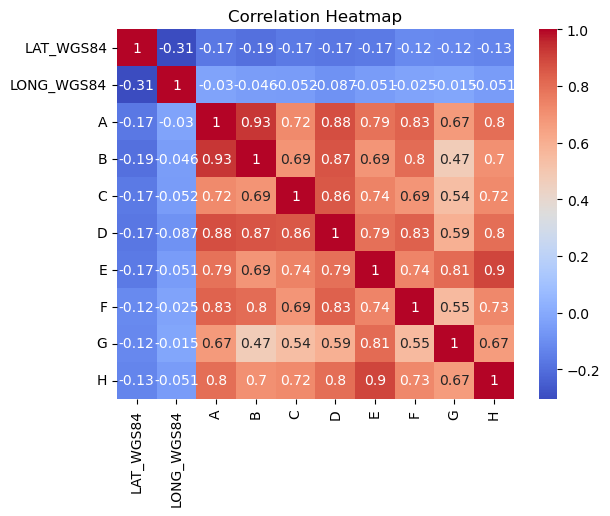

In [14]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot correlation heatmap
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

c:\Users\Raj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


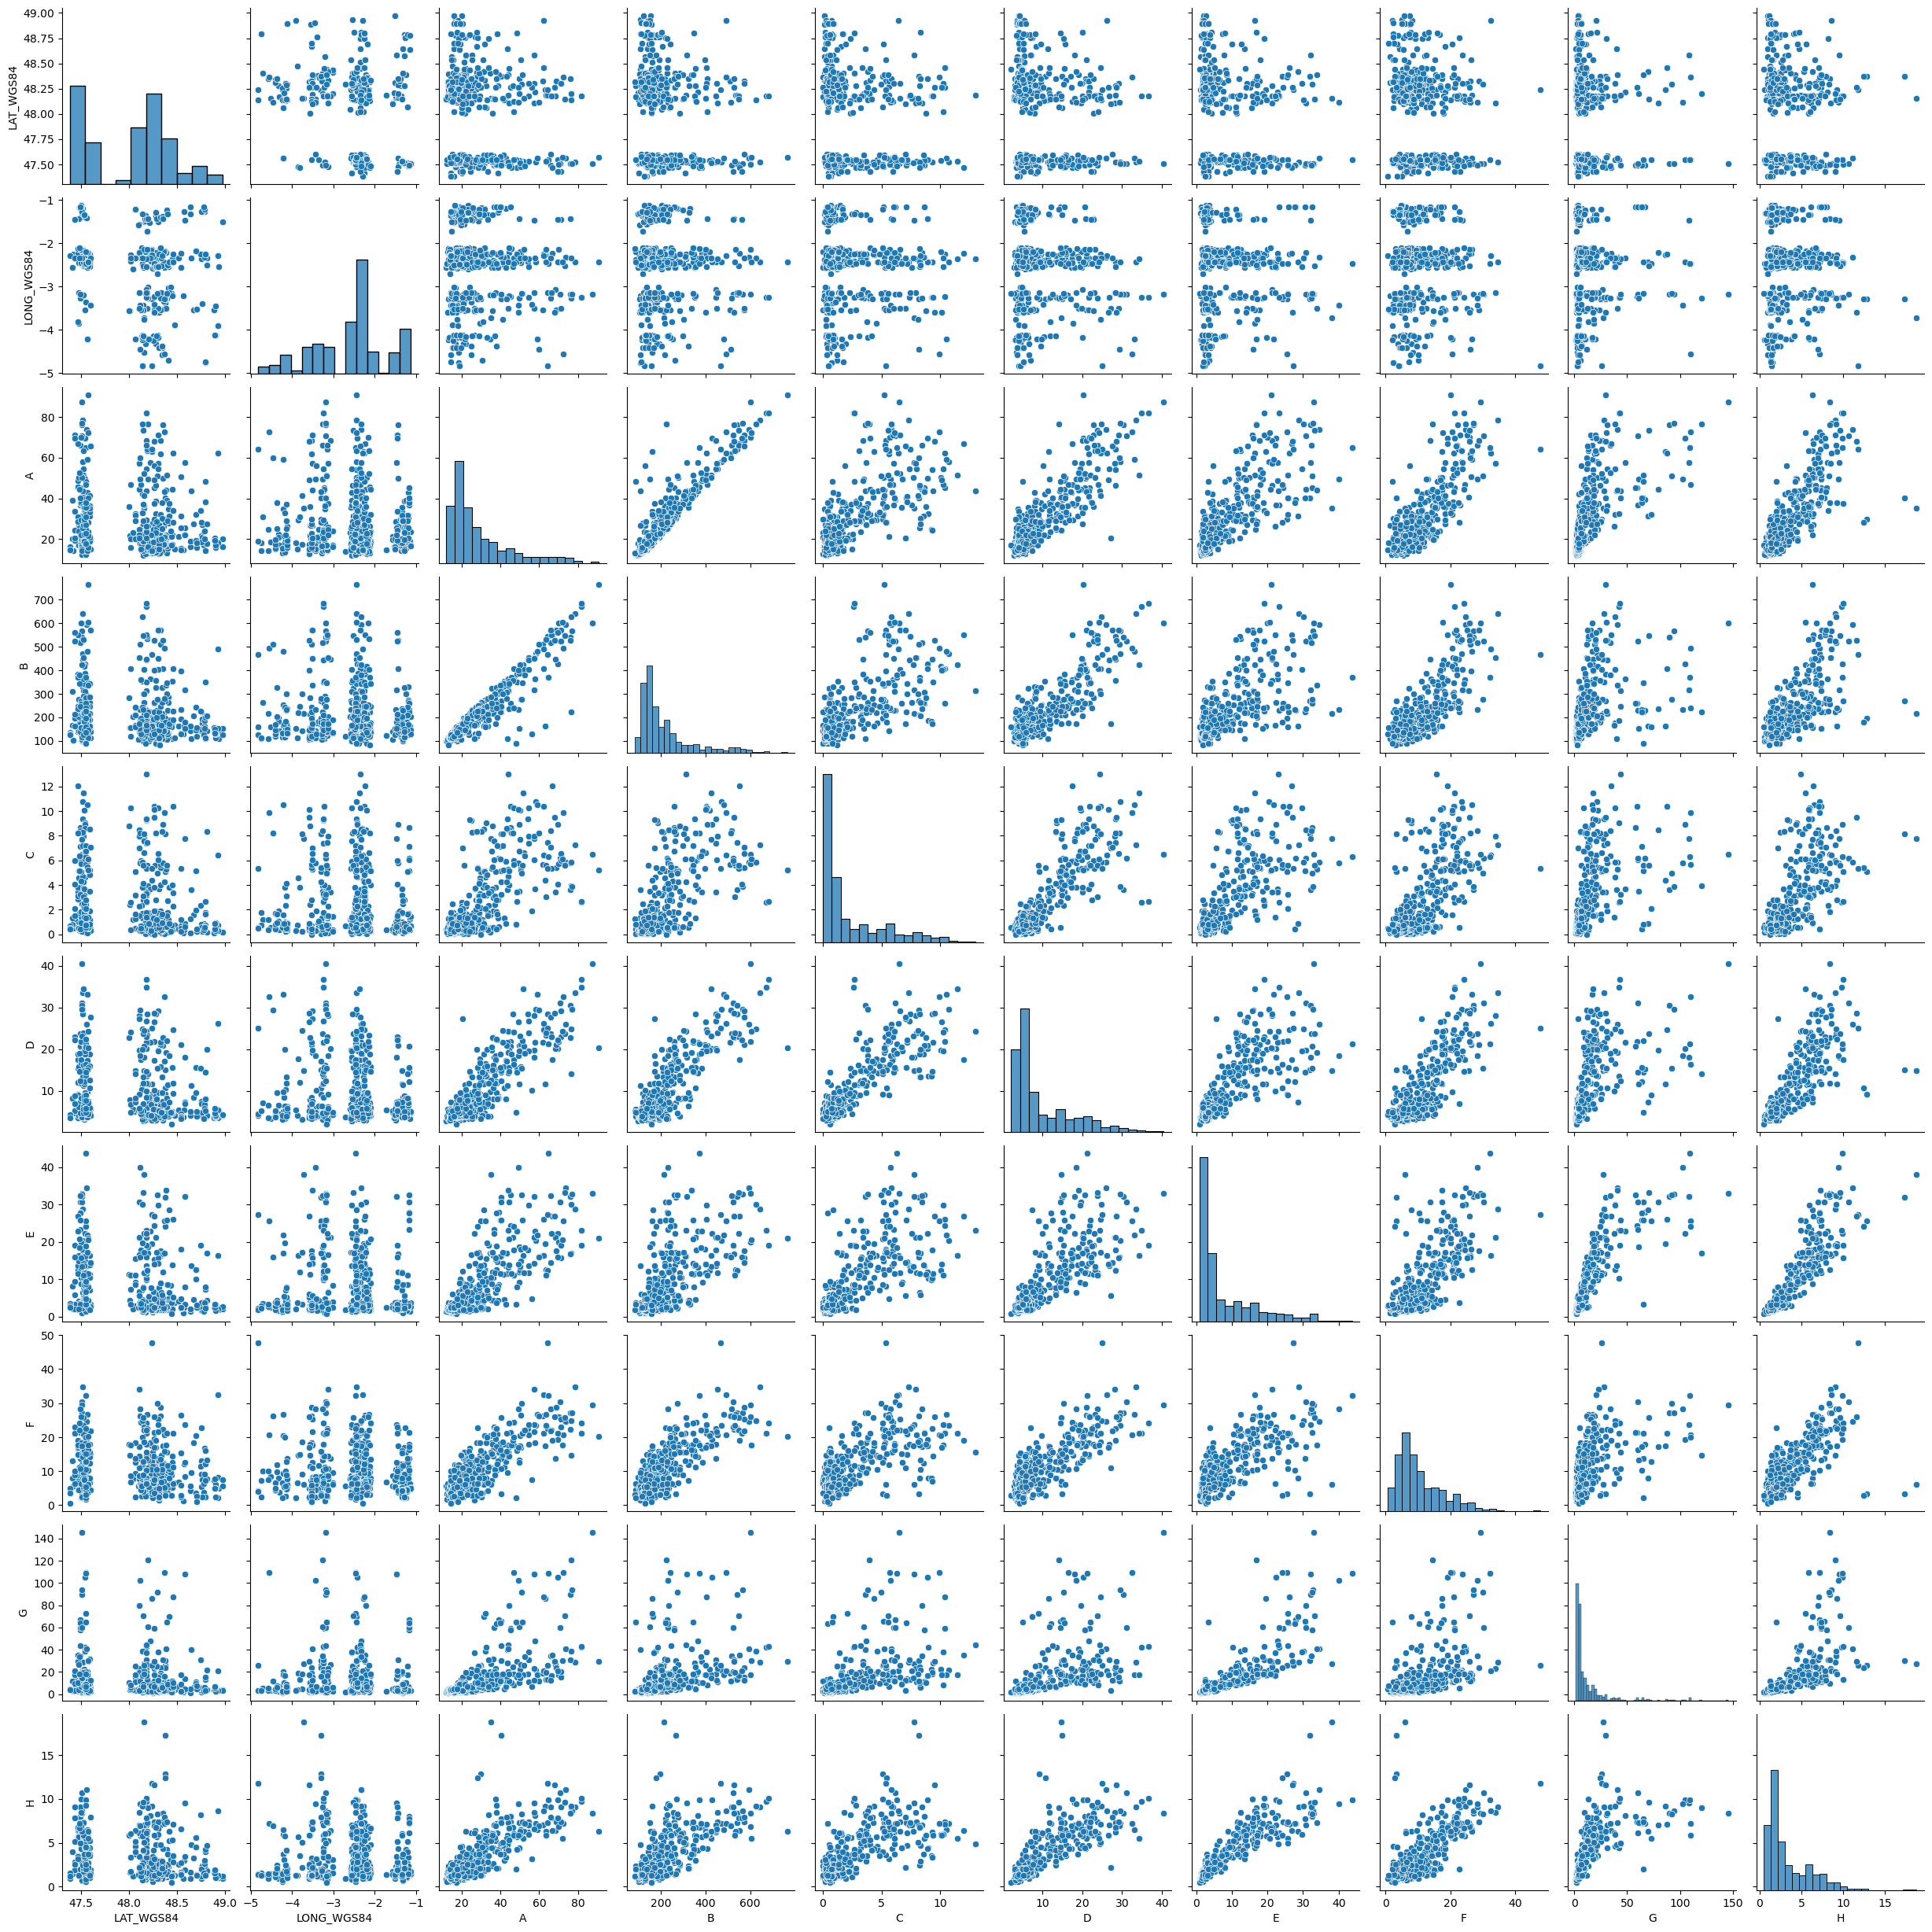

In [15]:
sns.pairplot(df2)
plt.show()

In [16]:
# LINEAR REGRESSION MODEL

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Independent variables (features)
X = df2[['LAT_WGS84','LONG_WGS84','A','B','C','E','F','G','H']]
# Dependent variable (target)
y = df2['D']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict
y_pred = model.predict(X_test)

In [16]:
# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Mean Squared Error: 4.161390316874381
R2 Score: 0.9120751905013784
Intercept: 3.610162730508379
Coefficients: [-0.11483868 -0.38385957 -0.00123634  0.02326691  1.09012966 -0.07989871
  0.15475578  0.03014538  0.46148076]


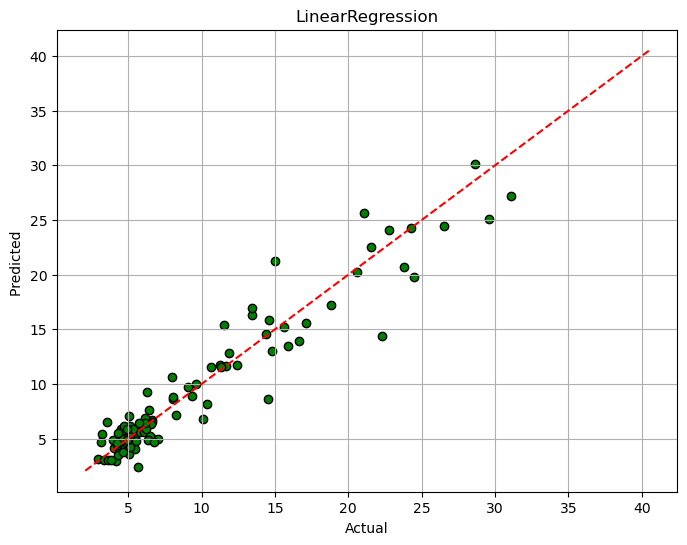

In [20]:
# Plot actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green', edgecolor='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Ideal line
plt.xlabel('Actual')
plt.ylabel('Predicted ')
plt.title('LinearRegression')
plt.grid(True)
plt.show()

In [21]:
# Compare actual vs predicted
comparison_df = pd.DataFrame({'Actual ': y_test.values, 'Predicted': y_pred})
print(comparison_df)

    Actual   Predicted
0      6.03   5.974908
1     13.46  16.337342
2      6.77   4.966883
3      5.03   3.612412
4      8.07   8.605525
..      ...        ...
91     6.75   4.690824
92    11.35  11.569210
93     4.89   4.925225
94     4.27   4.645300
95     3.14   4.691532

[96 rows x 2 columns]


In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
# Models dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Support Vector Regressor": SVR(),
    "KNN Regressor": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor()
}


In [26]:
# Train, predict, and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({
        "Model": name,
        "MSE": mse,
        "R2 Score": r2
    })

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1115
[LightGBM] [Info] Number of data points in the train set: 383, number of used features: 9
[LightGBM] [Info] Start training from score 9.659530
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [28]:
# Display results
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print(results_df)

                       Model        MSE  R2 Score
5              Random Forest   3.200729  0.932373
6          Gradient Boosting   3.241739  0.931506
11                  LightGBM   3.446452  0.927181
7                   AdaBoost   3.723603  0.921325
10                   XGBoost   3.778626  0.920163
3                 ElasticNet   4.043829  0.914559
1                      Ridge   4.158854  0.912129
0          Linear Regression   4.161390  0.912075
2                      Lasso   4.256358  0.910069
4              Decision Tree   4.576785  0.903298
9              KNN Regressor   6.766809  0.857026
8   Support Vector Regressor  12.303921  0.740034


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1115
[LightGBM] [Info] Number of data points in the train set: 383, number of used features: 9
[LightGBM] [Info] Start training from score 9.659530
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

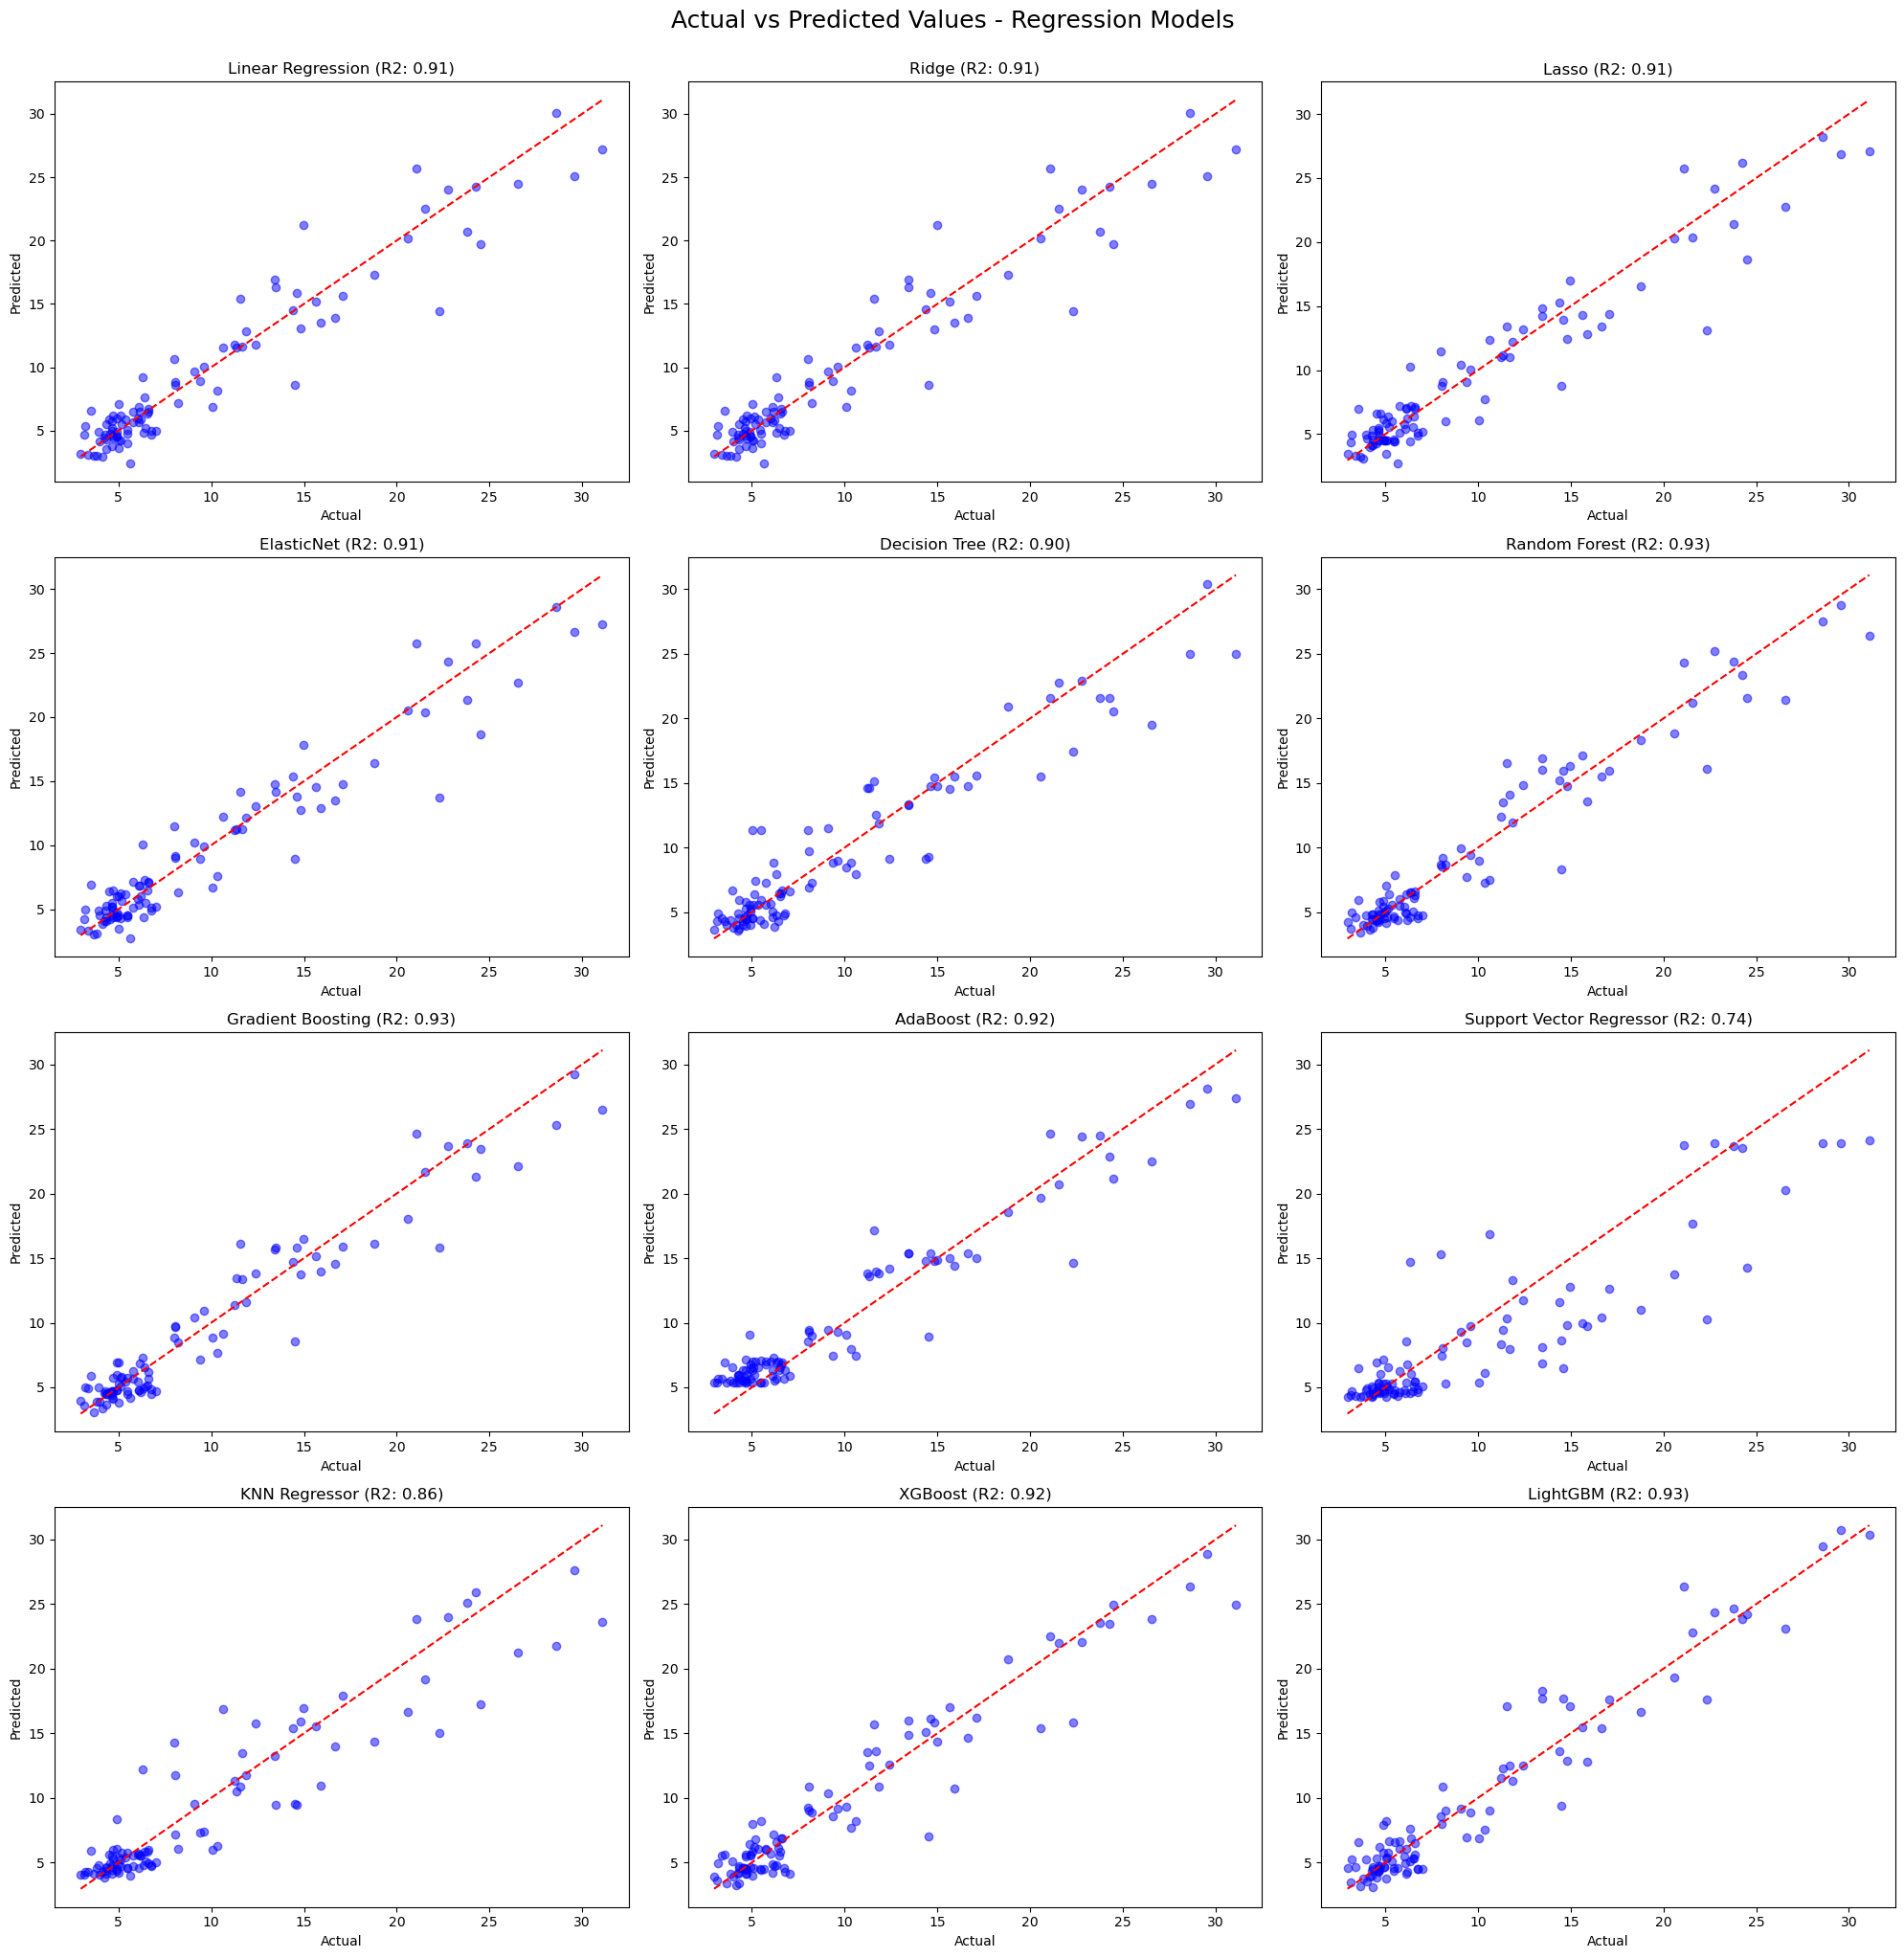

In [29]:
# Setup plots
plt.figure(figsize=(20, 20))
rows = 4
cols = 3

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Plot
    plt.subplot(rows, cols, i + 1)
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
    plt.title(f"{name} (R2: {r2_score(y_test, y_pred):.2f})")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")

plt.tight_layout()
plt.suptitle("Actual vs Predicted Values - Regression Models", fontsize=18, y=1.02)
plt.show()